In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast 
import numpy as np
import seaborn as sns
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills']  = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x) 

c:\Users\soods\anaconda3\envs\python_project_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_US_DA= df[(df['job_title_short'] == "Data Analyst") & (df['job_country'] == 'United States')].copy()
df_US_DA   =df_US_DA.dropna(subset=['salary_year_avg'])

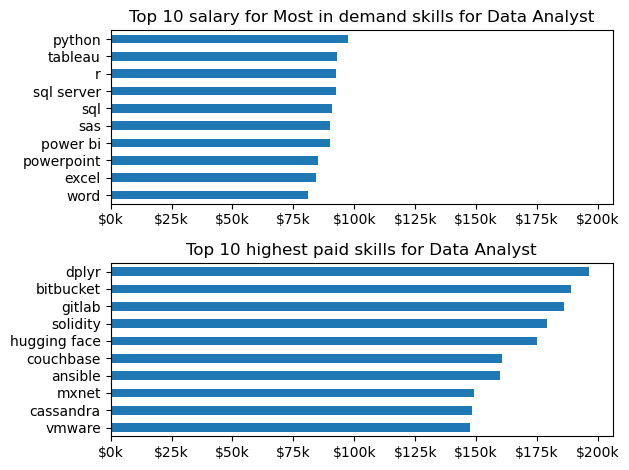

In [4]:
df_US_DA= df_US_DA.explode(column='job_skills')
df_US_DA_group = df_US_DA.groupby('job_skills').agg(
    count_of_job = ('job_skills','count'),
    median_sal = ('salary_year_avg','median')
)

top10_count = df_US_DA_group.sort_values( by= 'count_of_job', ascending= False).head(10).sort_values( by= 'median_sal', ascending= False)
top10_median_sal =df_US_DA_group.sort_values(by='median_sal', ascending= False).head(10)


fig , ax = plt.subplots(2,1)


top10_median_sal.plot(kind= 'barh' , y='median_sal', ax=ax[1], legend = False)
ax[1].invert_yaxis()
ax[1].set_title('Top 10 highest paid skills for Data Analyst')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,__ : f'${int(x/1000)}k'))


top10_count.plot(kind= 'barh' , y='median_sal', ax=ax[0], legend= False)
ax[0].invert_yaxis()
ax[0].set_xlim(ax[1].get_xlim())
ax[0].set_title('Top 10 salary for Most in demand skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,__ : f'${int(x/1000)}k'))

fig.tight_layout()
plt.show()

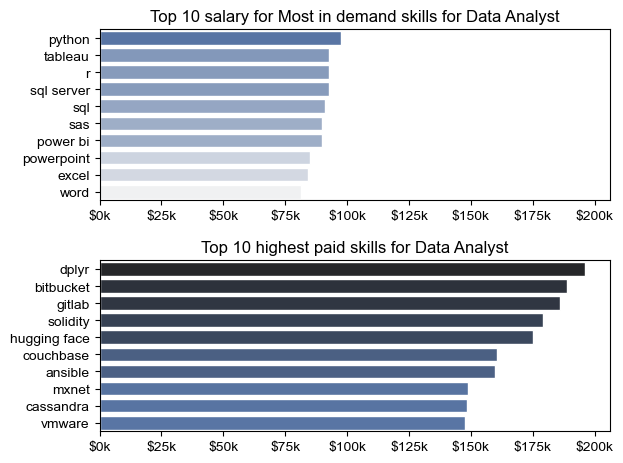

In [5]:
df_US_DA= df_US_DA.explode(column='job_skills')
df_US_DA_group = df_US_DA.groupby('job_skills').agg(
    count_of_job = ('job_skills','count'),
    median_sal = ('salary_year_avg','median')
)

top10_count = df_US_DA_group.sort_values( by= 'count_of_job', ascending= False).head(10).sort_values( by= 'median_sal', ascending= False)
top10_median_sal =df_US_DA_group.sort_values(by='median_sal', ascending= False).head(10)


fig , ax = plt.subplots(2,1)
sns.set_theme(style='ticks')

sns.barplot(data=top10_median_sal, x= 'median_sal', y=top10_median_sal.index, ax = ax[1], hue = 'median_sal', palette='dark:b_r')
#top10_median_sal.plot(kind= 'barh' , y='median_sal', ax=ax[1], legend = False)
#ax[1].invert_yaxis()
ax[1].set_title('Top 10 highest paid skills for Data Analyst')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,__ : f'${int(x/1000)}k'))
ax[1].legend().remove()


sns.barplot(data=top10_count, x= 'median_sal', y=top10_count.index, ax = ax[0], hue = 'median_sal', palette='light:b')
#top10_count.plot(kind= 'barh' , y='median_sal', ax=ax[0], legend= False)
#ax[0].invert_yaxis()
ax[0].set_xlim(ax[1].get_xlim())
ax[0].set_title('Top 10 salary for Most in demand skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,__ : f'${int(x/1000)}k'))
ax[0].legend().remove()


fig.tight_layout()
plt.show()

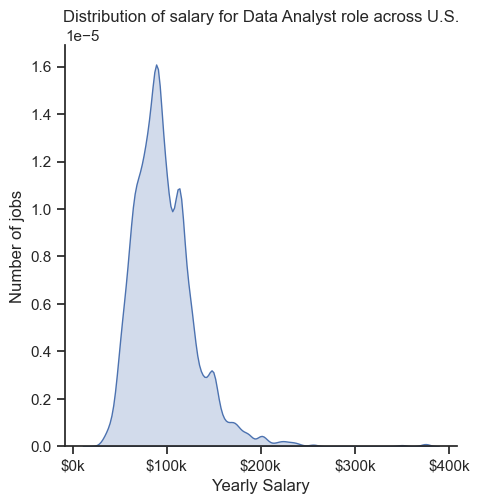

In [6]:
#plt.xlim(0,250000)

sns.displot(df_US_DA['salary_year_avg'], kind='kde', fill = True)

ax= plt.gca()

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x , pos: f'${int(x/1000)}k'))
plt.title('Distribution of salary for Data Analyst role across U.S.')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of jobs')

plt.show()

# Boxplot using seaborn

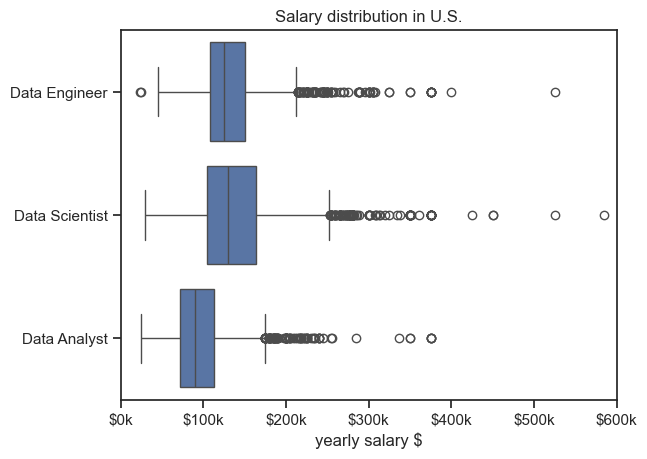

In [8]:
job_title = ['Data Analyst','Data Engineer','Data Scientist']

df_US = df[(df['job_title_short'].isin(job_title)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == jt]['salary_year_avg'] for jt in job_title]

#plt.boxplot(job_list, labels = job_title, vert = False)

sns.boxplot(data = df_US , x= 'salary_year_avg', y='job_title_short')
plt.title('Salary distribution in U.S.')
plt.xlabel('yearly salary $')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,__ : f'${int(x/1000)}k'))
plt.xlim(0,600000)
plt.show()